Задание 1. реализовать собственную лин регрессию по градиентному бустингу с заданным
p - число итераций
eps - шаг
и произвольное заданными начальными точками x0 и y0

In [ ]:
from sklearn.datasets import load_diabetes
import pandas as pd
diabetes = load_diabetes()
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

df['target'] = diabetes.target

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


уменьшим размерность с помощью PCA(метод главных компонент. Сутью является выделение n_component с наибольшей дисперсией на основе SVD разложения центрированной матрицы), так как мы его нигде не применяли

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)

X_pca = pca.fit_transform(df.iloc[:, :-1])

In [ ]:
df_new = pd.DataFrame(data=X_pca, columns=['Component'])

df_new['target'] = diabetes.target
df_new

,Component,target
0,0.027930,151.0
1,-0.134687,75.0
2,0.012944,141.0
3,0.002344,206.0
4,-0.035979,135.0
...,...,...
437,0.058958,178.0
438,0.060157,104.0
439,-0.009761,132.0
440,0.032957,220.0


объявляем начальные условия и градиенты двух функций(MAE И MSE) для градиентного спуска


In [ ]:
import numpy as np

x0, y0 = 100, 100
eps = 0.02
p = 100


def ds_mse(x, y, a, b):
  ds_da = -2 * np.mean(x*(y-(a*x+b)))
  ds_db = -2*np.mean(y-(a*x+b))
  return ds_da, ds_db


def ds_mae(x, y, a, b):
  ds_da = np.mean(-np.sign(y-(a*x+b))*x)
  ds_db = np.mean(-np.sign(y-(a*x+b)))
  return ds_da, ds_db

передаем весь датасет, начальные точки(a, b), точность, кол-во итераций,функция (mse, mae)


In [ ]:
def grad(data, a, b, eps, p, func="mse"):
  if p == 0:
    return a, b
  if func == "mse":
    temp = ds_mse(data.iloc[:, 0].values, data.iloc[:, 1].values, a, b)
    a_new = a - eps*temp[0]
    b_new = b - eps*temp[1]
  else:
    temp = ds_mae(data.iloc[:, 0].values, data.iloc[:, 1].values, a, b)
    a_new = a - eps*temp[0]
    b_new = b - eps*temp[1]
  return grad(data, a_new, b_new, eps, p-1, func)

выведим результирущий кэфы

In [ ]:
a_res, b_res = grad(df_new, x0, y0, eps, p)
print(a_res, b_res )
y_pred_1 = a_res*df_new.iloc[:, 0].values+b_res

112.45472816200076 151.25397563577832


Сравним результаты с дефолтной линейной регрессией

рассчитаем все типичные регрессионные метрики:MSE, MSLE, MAE, R2, RMSE

результат для лин регрессии sklearn

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error, r2_score

X = df_new.iloc[:, 0].values.reshape(-1, 1)
y = df_new.iloc[:, 1]
regression_model = LinearRegression()
regression_model.fit(X, y)


y_pred = regression_model.predict(X)

mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print("MSE:", mse)
print("MSLE:", mean_squared_log_error(y, y_pred))
print("MAE:", mean_absolute_error(y, y_pred))
print("R2:", r2_score(y, y_pred))
print("RMSE:", rmse)


MSE: 4100.976103352821
MSLE: 0.22744259406820808
MAE: 53.17779339434823
R2: 0.30842230926109016
RMSE: 64.03886400735745


наша собственная

In [ ]:
mse = mean_squared_error(y, y_pred_1)
rmse = np.sqrt(mse)

print("MSE:", mse)
print("MSLE:", mean_squared_log_error(y, y_pred_1))
print("MAE:", mean_absolute_error(y, y_pred_1))
print("R2:", r2_score(y, y_pred_1))
print("RMSE:", rmse)

MSE: 5128.027050275649
MSLE: 0.28534461114770215
MAE: 61.1801316501828
R2: 0.1352231722157914
RMSE: 71.61024403167224


выведим облауо исходных точек и две наши лин регрессии

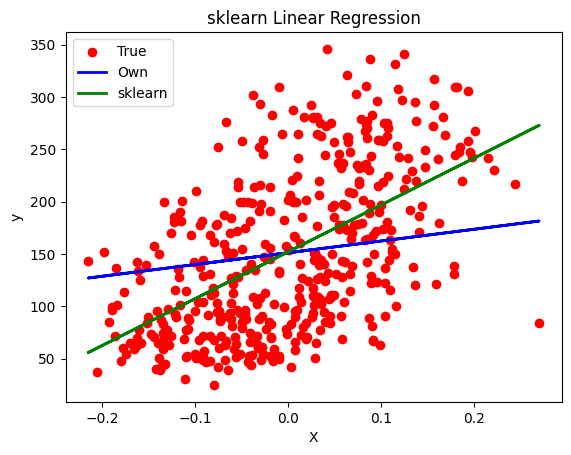

In [ ]:
import matplotlib.pyplot as plt


plt.scatter(X, y, color='red', label='True')
plt.plot(X, y_pred_1, color='blue', linewidth=2, label='Own')
plt.legend()
plt.title('Own Linear Regression')
plt.xlabel('X')
plt.ylabel('y')


plt.plot(X, y_pred, color='green', linewidth=2, label='sklearn')
plt.legend()
plt.title('sklearn Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

Задание 2. кластеризация артиста по 5 наиболее часто встречающимся словам в тексте


Для творческого задания кластеризации я поставил забавную гипотезу: взяв 6 исполнителей "новый школы хип-хопа" и взяв топ 5 полпулрных слов тексте доказать, что данные артисты плохо кластеризируются, как следствие можно утверждать два факта либо 5 слов слишком мало чтобы судить или нужно придумывать более сложные фичи, либо их текстовое наполнение очень схожи


In [ ]:
from sklearn.cluster import KMeans
df2 = pd.read_csv("zad2.csv")
df2

,0dim,1dim,2dim,3dim,4dim,5dim,6dim,7dim,8dim,9dim,...,471dim,472dim,473dim,474dim,475dim,476dim,477dim,478dim,479dim,artist
0,-1.993811,-0.266061,-0.210171,-0.306936,-0.040057,-0.104719,2.012425,0.467140,0.367587,-0.688097,...,2.379533,-1.240142,0.553801,0.049030,-1.659740,0.022050,-0.109965,-2.282593,-2.709512,feduk
1,-2.771128,-0.067295,-1.337524,-0.880683,0.192747,-0.571563,2.266033,0.760548,0.273946,-0.659343,...,-0.013569,-0.724008,0.415332,1.446282,-1.824249,0.123603,0.691293,-0.244645,-3.060885,feduk
2,-0.075212,0.748339,-0.783331,-1.425461,-0.412704,-0.053469,0.805015,-0.166653,0.069181,-1.768311,...,1.726969,-0.623760,-0.824115,-2.346026,-0.445910,0.285524,-0.177419,-2.912586,-2.642862,feduk
3,-1.092961,0.857481,-0.320937,-0.741386,-0.290735,-1.751414,2.605419,-0.382000,-0.657195,0.625653,...,0.996912,-0.516245,-0.585654,1.408529,0.305304,1.674115,1.436581,-0.124164,-0.874178,feduk
4,0.105766,1.665687,-0.172073,0.108631,-0.731603,0.205345,-1.791979,-0.850348,-0.452712,-0.893857,...,1.330153,-0.223037,0.808157,0.280352,0.803274,-0.564426,1.322792,-1.798500,-1.936645,feduk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,-0.568237,-0.873382,-0.973531,-0.081984,-0.087287,-0.649322,0.471125,1.116552,-1.229762,0.306145,...,-0.443648,-1.383567,0.876507,0.664355,2.974190,0.162260,-0.507671,0.974799,-0.290725,lil+morty
147,-1.369670,-2.065455,-0.903545,0.529433,-0.477494,-0.076344,1.317042,1.700512,-0.413428,-0.036222,...,-1.706023,-1.011775,-1.898196,0.374644,2.373111,0.483594,-0.173482,-0.024658,-1.625913,lil+morty
148,-0.857249,2.187487,0.547418,0.519108,-0.255638,0.761378,1.141846,-1.571377,-0.402905,2.471180,...,0.755574,-0.022278,1.709906,1.598836,-0.535530,0.843611,1.513145,-0.476871,-0.283477,lil+morty
149,0.573459,1.154440,0.246422,-0.653730,1.380029,0.135265,-1.439062,-0.717203,-1.026368,-0.889257,...,0.949536,1.158573,1.149622,-0.003831,-1.126239,1.123903,1.104083,1.700643,-3.864185,lil+morty


In [ ]:
kmeans = KMeans(n_clusters=6, random_state=42, n_init="auto").fit(df2.iloc[:, :-1])

In [ ]:
ansk = kmeans.cluster_centers_
ansk

array([[ 0.51574364,  1.32651652, -0.21918074, ..., -0.68559097,
         0.95742077,  0.49043194],
       [-1.25475445, -0.43285798, -0.64349849, ...,  0.74038784,
         0.08477247, -1.01213144],
       [ 0.31338558,  1.20827514, -0.41765585, ...,  1.19010933,
        -0.49766304, -1.12912935],
       [-1.28857549, -0.15732984, -0.19039805, ...,  0.51476701,
        -0.28851055,  0.13772778],
       [-0.33641152, -0.23792387,  0.02917419, ...,  1.30908893,
         1.15634185, -2.13014035],
       [ 0.10783807,  0.85041728, -0.3380902 , ...,  0.77233409,
        -0.47764814, -1.18124789]])

In [ ]:
predicted_clusters = kmeans.labels_
kmeans.labels_

array([3, 3, 2, 2, 2, 2, 5, 1, 2, 2, 2, 5, 1, 1, 2, 2, 2, 3, 2, 5, 2, 1,
       2, 2, 2, 5, 2, 2, 2, 5, 2, 5, 1, 5, 2, 2, 2, 1, 3, 2, 2, 1, 0, 2,
       3, 5, 2, 1, 3, 3, 3, 5, 5, 5, 3, 5, 3, 5, 3, 3, 3, 5, 5, 5, 1, 3,
       5, 2, 2, 5, 2, 2, 1, 2, 2, 2, 5, 2, 2, 5, 5, 5, 1, 1, 2, 2, 2, 5,
       2, 5, 2, 3, 5, 2, 1, 4, 5, 2, 2, 2, 2, 5, 0, 1, 1, 0, 2, 0, 2, 2,
       2, 1, 3, 5, 2, 3, 1, 2, 1, 3, 2, 3, 1, 3, 5, 1, 3, 5, 3, 5, 2, 3,
       5, 2, 5, 3, 3, 1, 2, 3, 2, 1, 2, 0, 5, 4, 5, 1, 3, 2, 2],
      dtype=int32)

используем основные метрики кластеризации для оценки кластеризации:
кэф силуэта в нашем случае близок к 0 означает об наложении разных кластеров друг к другу;
Calinski-Harabasz отношения ("взвешенных") межгрупповой дисперсии на внутреннегруповую, значение 3 считается небольшим значением и
 резльтат также считается- наложения наблюдений различных кластеров;
Davies-Bouldin score -учитывает срднее растояние наблюдений внутри кластеров и среднее расстояние между центроидам и ,беря сумму, таким образом значение близкое к 0-хорошая кластеризация, но у нас не так





In [ ]:
from sklearn import metrics
X = df2.iloc[:, :-1]
silhouette_score = metrics.silhouette_score(X, predicted_clusters)
calinski_harabasz_score = metrics.calinski_harabasz_score(X, predicted_clusters)
davies_bouldin_score = metrics.davies_bouldin_score(X, predicted_clusters)

print("Silhouette score:", silhouette_score)
print("Calinski-Harabasz score:", calinski_harabasz_score)
print("Davies-Bouldin score:", davies_bouldin_score)

Silhouette score: -0.00023617433566824666
Calinski-Harabasz score: 3.2679085612395578
Davies-Bouldin score: 3.8206056459216504
